In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import jaccard_score

In [84]:
data = "../../DataSets/SVM/cell_samples.csv"
df = pd.read_csv(data)

In [85]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [86]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

<Axes: >

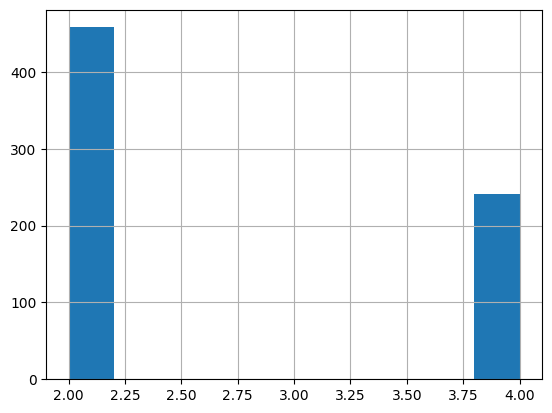

In [87]:
df['Class'].hist()

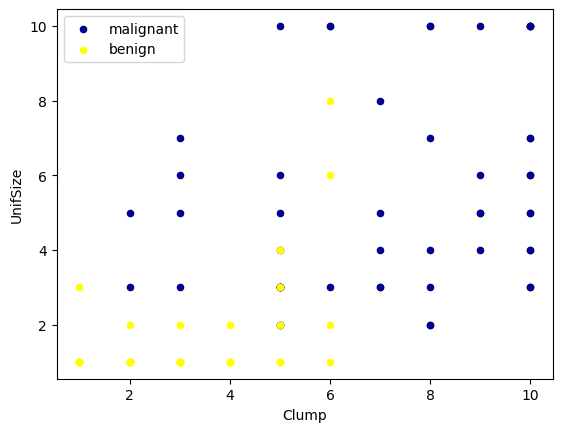

In [88]:
ax = df[df['Class'] == 4][0:50].plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', color = 'DarkBlue', label='malignant')
df[df['Class'] == 2][0:50].plot(kind = 'scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax)
plt.show()

In [89]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [90]:
print(df['BareNuc'].value_counts())

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64


In [91]:
df = df[pd.to_numeric(df['BareNuc'], errors = 'coerce').notnull()]

In [92]:
df['BareNuc'] = df['BareNuc'].astype('int64')

In [93]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [94]:
cell_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x = np.asarray(cell_df)
x[:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [95]:
y = np.asarray(df['Class'])
y[:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [97]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(546, 9) (546,)
(137, 9) (137,)


In [98]:
#kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
SV = svm.SVC(kernel = 'precomputed')
SV.fit(x_train, y_train)


SVC(kernel='sigmoid')

In [99]:
y_predicted = SV.predict(x_test)

In [100]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[54 36]
 [47  0]]


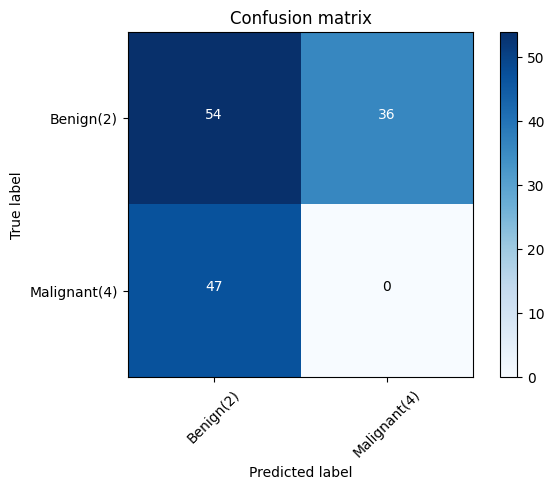

In [101]:
conf_matrix = confusion_matrix(y_test, y_predicted, labels = [2,4])
np.set_printoptions(precision = 2)

plt.figure()
plot_confusion_matrix(conf_matrix, classes = ['Benign(2)','Malignant(4)'], normalize = False, title = 'Confusion matrix')

In [102]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           2       0.53      0.60      0.57        90
           4       0.00      0.00      0.00        47

    accuracy                           0.39       137
   macro avg       0.27      0.30      0.28       137
weighted avg       0.35      0.39      0.37       137



In [103]:
jaccard_score(y_test, y_predicted, pos_label = 2)

0.39416058394160586